# Stock Price Prediction - LSTM Implementation versus ARIMA / SARIMAX framework

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
from sklearn.metrics import mean_squared_error

### Downloading the stock prices data split across training and test

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


## LSTM Implementation of Stock Price prediction

## Part 1 - Data Preprocessing

In [ ]:
#working on the train data and not exposing test to the implementation
dataset_train = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
#Feature Scaling
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
#Creating a data structure with 60 time steps and 1 output
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Part 2 - Building the RNN

In [ ]:
# Intializing the RNN
regressor = Sequential()

#Adding the first LSTM layer and some drop out regularization
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding second LSTM layer and some drop out regularization
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#Adding third LSTM layer and some drop out regularization
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#Adding fourth LSTM layer and some drop out regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding output layer
regressor.add(Dense(units = 1))

#Compiling the RNN
regressor.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [ ]:
#Fitting the RNN to the training
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 119ms/step - loss: 0.0318
Epoch 2/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0039
Epoch 13/100

# Part 3 - Making the predictions and visualizing the results

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train_arima.csv to Google_Stock_Price_Train_arima (1).csv


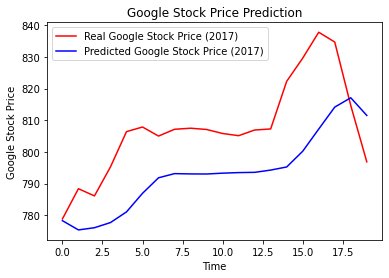

In [ ]:
#Getting the real stock price of 2017
dataset_test = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Test.csv']))
real_stock_price = dataset_test.iloc[:, 1:2].values

#Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test= np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Visualizing the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price (2017)')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price (2017)')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

# ARIMA implementation of the stock price prediction model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train_arima.csv to Google_Stock_Price_Train_arima (2).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train_arima.csv']), index_col='Date', parse_dates=True)
df = df.asfreq(freq='D', fill_value=0)

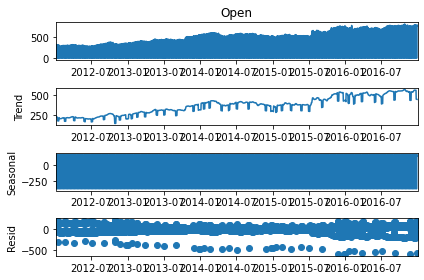

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Open'], model='add')
result.plot();

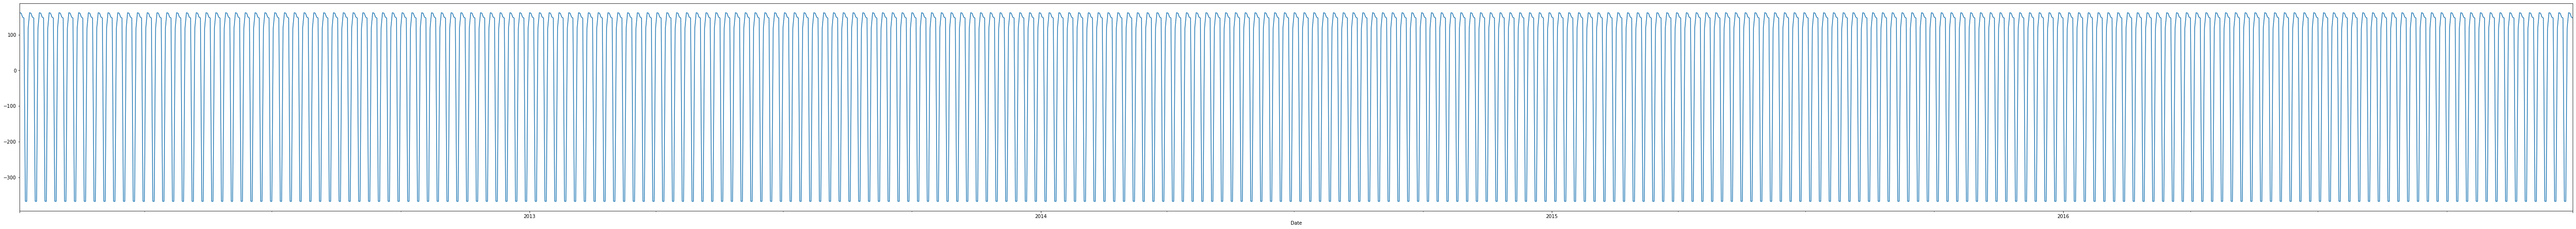

In [ ]:
result.seasonal.plot(figsize=(96,8))

In [5]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 42.8 MB/s 
     |████████████████████████████████| 9.5 MB 48.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [11]:
pip uninstall statsmodels
pip install statsmodels

     |████████████████████████████████| 9.5 MB 4.1 MB/s 


In [1]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARIMAResults, ARMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
auto_arima(df['Open'], seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1824
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -12192.009
Date:                Fri, 03 Sep 2021   AIC                          24396.019
Time:                        21:09:28   BIC                          24429.068
Sample:                             0   HQIC                         24408.211
                               - 1824                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1302      0.095      1.371      0.170      -0.056       0.316
ar.L1          0.9243      0.019     48.252      0.000       0.887       0.962
ar.L2         -0.6536      0.022    -29.243      0.000      -0.697      -0.610
ma.L1         -1.7195      0.021    -81.521      0.000      -1.761      -1.678
ma.L2          0.7385      0.021     35.161      0.000       0.697       0.780
sigma2      3.761e+04   1469.387     25.598      0.000    3.47e+04    4.05e+04
===================================================================================
Ljung-Box (L1) (Q):                   4.41   Jarque-Bera (JB):                38.18
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               3.49   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = SARIMAX(df['Open'], order=(0,1,0), seasonal_order=(1,0,0,7))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              Open   No. Observations:                 1824
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 7)   Log Likelihood              -11807.454
Date:                           Fri, 03 Sep 2021   AIC                          23618.908
Time:                                   21:13:51   BIC                          23629.924
Sample:                               01-03-2012   HQIC                         23622.972
                                    - 12-30-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.8554      0.010     82.373      0.000       0.835       0.876
sigma2      2.461e+04    399.828     61.556      0.000    2.38e+04    2.54e+04
===================================================================================
Ljung-Box (L1) (Q):                 378.35   Jarque-Bera (JB):              7274.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.37   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test_arima.csv to Google_Stock_Price_Test_arima.csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Test_arima.csv']), index_col='Date', parse_dates=True)
df1 = df1.asfreq(freq='D', fill_value=0)

In [ ]:
start = len(df)
end = len(df) + len(df1) - 1
predictions = results.predict(start, end, type='levels').rename('SARIMA Predictions')

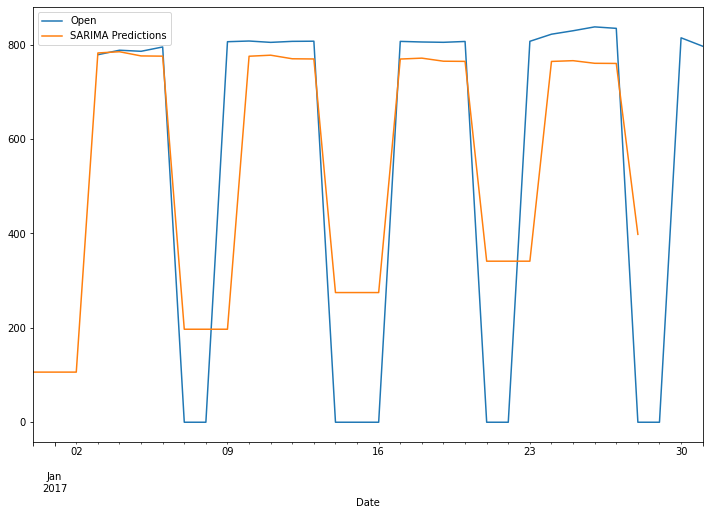

In [ ]:
df1['Open'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [ ]:
from statsmodels.tools.eval_measures import rmse
error = rmse(df1['Open'], predictions)
error

574.9382443508156

In [ ]:
df1['Open'].std()

380.4064139892849

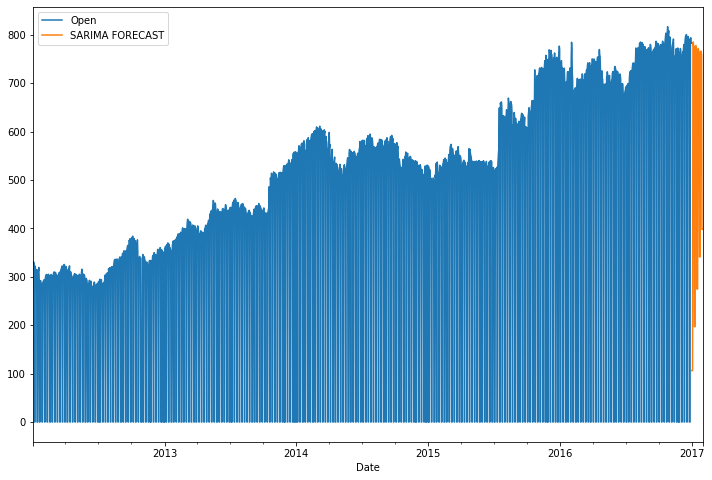

In [ ]:
model = SARIMAX(df['Open'],order=(0,1,0), seasonal_order=(1,0,0,7))
results = model.fit()
fcast = results.predict(len(df),len(df)+30,type='levels').rename('SARIMA FORECAST')
df['Open'].plot(legend=True, figsize=(12,8))
fcast.plot(legend=True)

# Comparing performance between LSTM and ARIMA framework for the minimum daily temperature dataset


### This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.
### The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving daily-min-temperatures.txt to daily-min-temperatures.txt


In [14]:
dataset = pd.read_csv(io.BytesIO(uploaded['daily-min-temperatures.txt']))
#starts at 1jan1981
#ends at 31dec1990
#test will have oct-dec of 1990
train = dataset.iloc[0:3558,]
test = dataset.iloc[3558:3650,]

In [15]:
#keeping only the temperature field
training_set = train.iloc[:, 1:2].values

#Feature Scaling
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(training_set)

#Creating a data structure with 90 time steps and 1 output
x_train = []
y_train = []
for i in range(90, 3558):
    x_train.append(train_set_scaled[i-90:i, 0])
    y_train.append(train_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
# Intializing the RNN
regressor = Sequential()

#Adding the first LSTM layer and some drop out regularization
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding second LSTM layer and some drop out regularization
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#Adding third LSTM layer and some drop out regularization
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#Adding fourth LSTM layer and some drop out regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding output layer
regressor.add(Dense(units = 1))

#Compiling the RNN
regressor.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [17]:
#Fitting the RNN to the training
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
109/109 [==============================] - 25s 169ms/step - loss: 0.0218
Epoch 2/100
109/109 [==============================] - 18s 168ms/step - loss: 0.0149
Epoch 3/100
109/109 [==============================] - 18s 169ms/step - loss: 0.0138
Epoch 4/100
109/109 [==============================] - 18s 169ms/step - loss: 0.0136
Epoch 5/100
109/109 [==============================] - 18s 169ms/step - loss: 0.0137
Epoch 6/100
109/109 [==============================] - 18s 169ms/step - loss: 0.0139
Epoch 7/100
109/109 [==============================] - 18s 169ms/step - loss: 0.0134
Epoch 8/100
109/109 [==============================] - 18s 168ms/step - loss: 0.0131
Epoch 9/100
109/109 [==============================] - 18s 169ms/step - loss: 0.0127
Epoch 10/100
109/109 [==============================] - 18s 168ms/step - loss: 0.0127
Epoch 11/100
109/109 [==============================] - 18s 169ms/step - loss: 0.0127
Epoch 12/100
109/109 [==============================] - 18s 169

In [18]:
#Getting the real temperatures
real_temp = test.iloc[:, 1:2].values

#Getting the predicted temperatures
total = pd.concat((train['Temp'], test['Temp']), axis=0)
inputs = total[len(total)-len(test)-90:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(90, 182):
    x_test.append(inputs[i-90:i, 0])
x_test= np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_temp = regressor.predict(x_test)
predicted_temp = sc.inverse_transform(predicted_temp)

In [22]:
print('actual mean temperature: ',real_temp.mean())
print('predicted mean temperature: ',predicted_temp.mean())

actual mean temperature:  12.791304347826086
predicted mean temperature:  12.561424


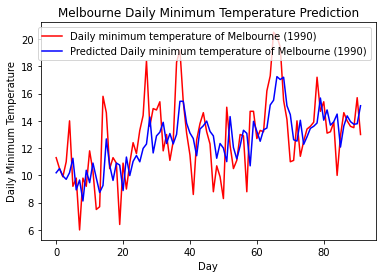

In [20]:
#Visualizing the results
plt.plot(real_temp, color = 'red', label = 'Daily minimum temperature of Melbourne (1990)')
plt.plot(predicted_temp, color = 'blue', label = 'Predicted Daily minimum temperature of Melbourne (1990)')
plt.title('Melbourne Daily Minimum Temperature Prediction')
plt.xlabel('Day')
plt.ylabel('Daily Minimum Temperature')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(real_temp, predicted_temp))
print('rmse is :',rmse)
print('mean of actuals is :',y_train.mean())
print('std dev of actuals is :',y_train.std())

rmse is : 2.3863956670968043
mean of actuals is : 0.4183759390582446
std dev of actuals is : 0.15273457511024743


## ARIMA framework

In [5]:
df = pd.read_csv(io.BytesIO(uploaded['daily-min-temperatures.txt']), index_col='Date', parse_dates=True)
df = df.asfreq(freq='D', fill_value=0)
df1 = df[:3560]
df2 = df[3560:]

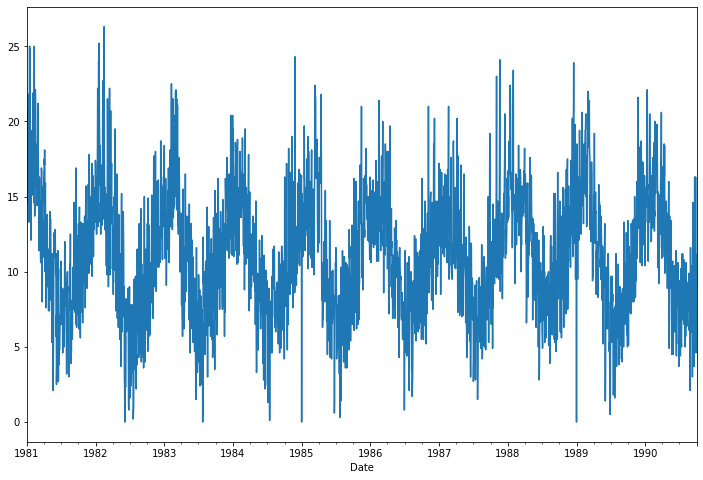

In [ ]:
df1['Temp'].plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df1['Temp'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -4.398269
p-value                    0.000299
# lags used               20.000000
# observations          3539.000000
critical value (1%)       -3.432199
critical value (5%)       -2.862357
critical value (10%)      -2.567205
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


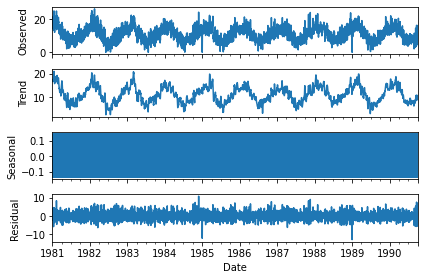

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1['Temp'], model='add')
result.plot();

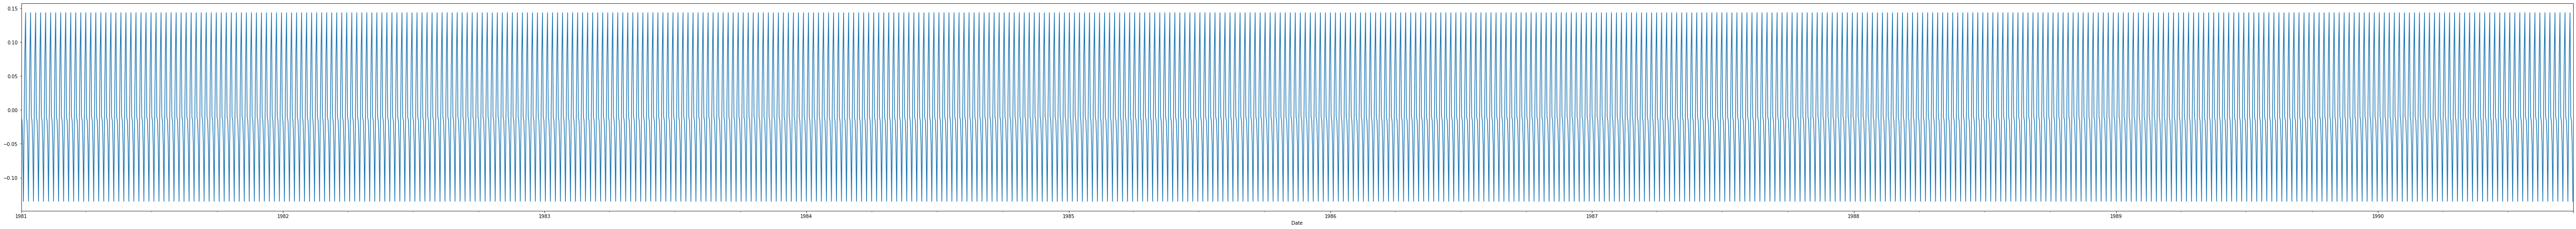

In [7]:
result.seasonal.plot(figsize=(96,8))

In [8]:
auto_arima(df['Temp'], seasonal=False, n_jobs=-1, max_iter=200, m=7, information_criterion='oob', out_of_sample_size=int(len(df)*0.2)).summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:77: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3652
Model:               SARIMAX(4, 0, 1)   Log Likelihood               -8432.799
Date:                Sun, 05 Sep 2021   AIC                          16879.599
Time:                        14:36:48   BIC                          16923.020
Sample:                             0   HQIC                         16895.062
                               - 3652                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0591      0.019      3.108      0.002       0.022       0.096
ar.L1          1.4735      0.020     73.797      0.000       1.434       1.513
ar.L2         -0.6069      0.029    -21.157      0.000      -0.663      -0.551
ar.L3          0.1280      0.030      4.330      0.000       0.070       0.186
ar.L4          0.0002      0.019      0.009      0.993      -0.036       0.037
ma.L1         -0.8918      0.013    -66.273      0.000      -0.918      -0.865
sigma2         5.9288      0.117     50.782      0.000       5.700       6.158
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               113.45
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.00
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
model = ARMA(df1['Temp'],order=(1,1))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3560
Model:                     ARMA(1, 1)   Log Likelihood               -8442.759
Method:                       css-mle   S.D. of innovations              2.592
Date:                Sun, 05 Sep 2021   AIC                          16893.518
Time:                        14:38:30   BIC                          16918.228
Sample:                    01-01-1981   HQIC                         16902.329
                         - 09-30-1990                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1431      0.247     45.116      0.000      10.659      11.627
ar.L1.Temp     0.8723      0.015     57.974      0.000       0.843       0.902
ma.L1.Temp    -0.2729      0.040     -6.804      0.000      -0.352      -0.194
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1463           +0.0000j            1.1463            0.0000
MA.1            3.6642           +0.0000j            3.6642            0.0000
-----------------------------------------------------------------------------
"""

In [10]:
start = len(df1)
end = len(df1) + len(df2) - 1
predictions = results.predict(start, end).rename('ARMA Predictions')

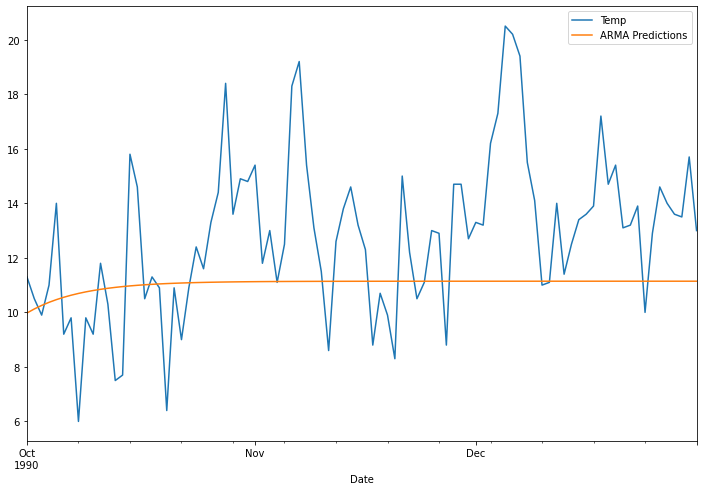

In [11]:
df2['Temp'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [12]:
df2['Temp'].mean()

12.791304347826088

In [13]:
predictions.mean()

11.043779591857058

### From performance indication above LSTM performs better than ARIMA framework in both non-time dependent (stock prices) and time dependent (daily minimum temperature) event forecasting.